## Instaling graph_tool



In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!mamba install -q graph-tool

## Head

In [ ]:
import pandas as pd
import numpy as np
import math

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
plt.switch_backend("cairo")
import seaborn as sns

import graph_tool.all as gt
from IPython import display


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading data

In [ ]:
data_path = "/content/drive/MyDrive/1 - Doutorado /Eventos/Complexity72h/Ecological networks/complexity72h-2025-main/data/"
ind_data = [
    "BEEFUN",
    "CARACOLES",
    "DIG_13",
    "DIG_50",
    "LPI_2858"
]

env_features = [
    "env.csv",
    "env.csv",
    "env.csv",
    "env.csv",
    "env.csv"
]

env_columns = [
    "x",
    "x",
    "sea_temperature",
    "sea_temperature",
    "rainfall"
]

In [ ]:
matrix_A = []
matrix_A_sd = []

matrix_B = []
matrix_B_sd = []

env_factors = []

for i,ind in enumerate(ind_data):
    matrix_A.append(pd.read_csv(data_path + ind + "/matrix_A.csv"))
    matrix_B.append(pd.read_csv(data_path + ind + "/matrix_B.csv"))

    matrix_A_sd.append(pd.read_csv(data_path + ind + "/matrix_A_sd.csv"))
    matrix_B_sd.append(pd.read_csv(data_path + ind + "/matrix_B_sd.csv"))

    env_factors.append(pd.read_csv(data_path + ind + "/" + env_features[i]))

## Pipeline to get weighted networks

In [ ]:
matrix_A_ts = {i:[] for i in range(len(ind_data))}

for i_db in range(len(ind_data)):
    factor = env_factors[i_db][env_columns[i_db]].values

    time_size = len(factor)
    print('time size =', time_size)

    array_A = matrix_A[i_db][matrix_A[i_db].columns[1:]].values
    array_B = matrix_B[i_db][matrix_B[i_db].columns[1:]].values

    for t in range(time_size):
        matrix_A_ts[i_db].append(array_A + array_B*factor[t])

time size = 8
time size = 9
time size = 43
time size = 27
time size = 15


### Testing weights

In [ ]:
# Testing the weights
all_together = []
for t in range(len(matrix_A_ts[0])):
    matrix = matrix_A_ts[0][t]
    all_together.append(matrix[np.where(~np.eye(matrix.shape[0], dtype=bool))])

In [ ]:
all_values = np.hstack(all_together)

0.010547781905355064


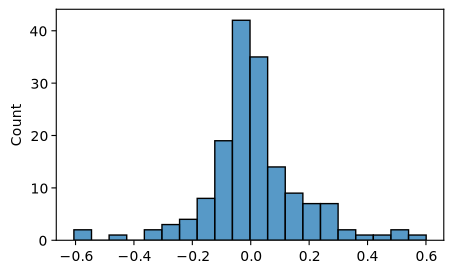

In [ ]:
fig, axs = plt.subplots( figsize=(5, 3), sharey=True)
sns.histplot(all_values, ax=axs, bins = 20)
#sns.histplot(all_values[all_values>0], ax=axs, bins = 10)
#sns.histplot(all_values[all_values<0], ax=axs, bins = 10)
print(np.mean(all_values))
fig.savefig('weights_hist.png', dpi=100, bbox_inches='tight')
plt.close()
display.Image('weights_hist.png')

In [ ]:
# testing one network weights



    pos_matrix =  np.where(matrix > (mu - sigma/2), matrix, 0)

    neg = np.where(matrix < 0, matrix, 0)
    neg = neg[neg<0]
    mu=np.mean(neg)
    sigma = np.std(neg)
    neg_matrix =  np.where(matrix > (mu + sigma/2), matrix, 0)

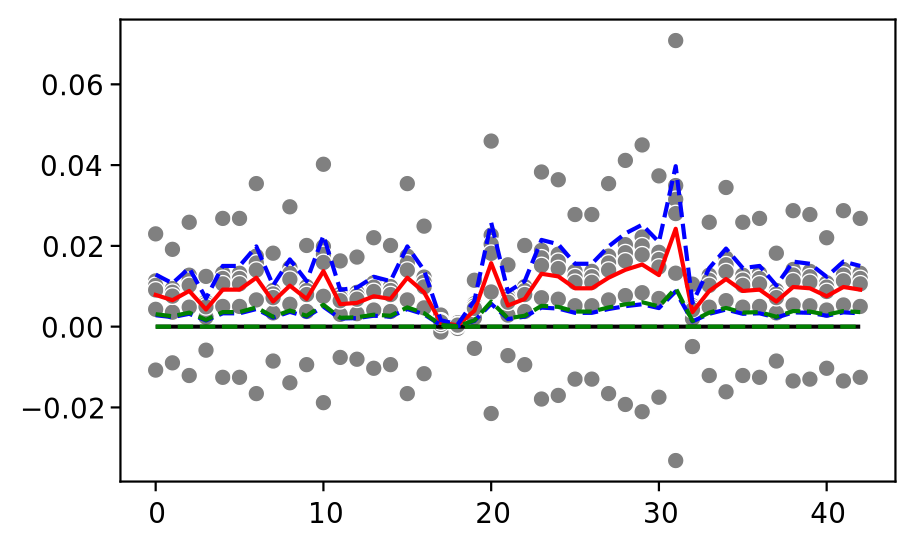

In [ ]:
i_db = 2
mean_values = []
std_values = []
pos_cut = []
neg_cut = []

fig, axs = plt.subplots( figsize=(5, 3), sharey=True)

for t in range(len(matrix_A_ts[i_db])):
    matrix = matrix_A_ts[i_db][t]
    off_diag = matrix[np.where(~np.eye(matrix.shape[0], dtype=bool))]
    mean_values.append(np.mean(off_diag))
    std_values.append(np.std(off_diag))

    pos =  np.where(off_diag > 0, off_diag, 0)
    pos = pos[pos>0]
    mu=np.mean(pos)
    sigma = np.std(pos)
    pos_cut.append(sigma/2)

    neg =  np.where(off_diag < 0, off_diag, 0)
    neg = neg[neg<0]
    mu=np.mean(neg)
    sigma = np.std(neg)
    neg_cut.append(-sigma/2)

    sns.scatterplot(x = t, y = off_diag, ax=axs, color = "gray")

mean_values = np.array(mean_values)
std_values = np.array(std_values)

axs.hlines(y=0, xmin=0, xmax=(len(matrix_A_ts[i_db])-1), color='black', linestyles='solid')

sns.lineplot(x = range(len(matrix_A_ts[i_db])), y = mean_values, ax=axs,  color='red')#label = 'mean',
sns.lineplot(x = range(len(matrix_A_ts[i_db])), y = mean_values+std_values/2, ax=axs, color='blue', linestyle='dashed')#, label = 'std'
sns.lineplot(x = range(len(matrix_A_ts[i_db])), y = mean_values-std_values/2, ax=axs, color='blue', linestyle='dashed')#, label = 'std'

sns.lineplot(x = range(len(matrix_A_ts[i_db])), y = pos_cut, ax=axs, color='green', linestyle='dashed')#, label = 'std'
sns.lineplot(x = range(len(matrix_A_ts[i_db])), y = neg_cut, ax=axs, color='green', linestyle='dashed')#, label = 'std'

fig.savefig('mean_dynamics.png', dpi=200, bbox_inches='tight')
plt.close()
display.Image('mean_dynamics.png')

In [ ]:
# matrix = matrix_A_ts[i_db][1]
# off_diag = matrix[np.where(~np.eye(matrix.shape[0], dtype=bool))]

# fig, axs = plt.subplots( figsize=(5, 3), sharey=True)
# sns.histplot(off_diag, ax=axs, bins = 20)

# pos = off_diag[off_diag>0]
# neg = off_diag[off_diag<0]
# #sns.histplot(all_values[all_values>0], ax=axs, bins = 10)
# #sns.histplot(all_values[all_values<0], ax=axs, bins = 10)
# mu = np.mean(off_diag)
# sigma = np.std(off_diag)

# axs.vlines(x=mu, ymin=0, ymax=5, color='red', linestyles='solid')
# axs.vlines(x=(mu+sigma/2), ymin=0, ymax=5, color='black', linestyles='dashed')
# axs.vlines(x=(mu-sigma/2), ymin=0, ymax=5, color='black', linestyles='dashed')

# pos_mu = np.mean(pos)
# pos_sigma = np.std(pos)
# neg_mu = np.mean(neg)
# neg_sigma = np.std(neg)
# print(pos_mu, pos_sigma)
# print(neg_mu, neg_sigma)
# axs.vlines(x=pos_mu, ymin=0, ymax=5, color='green', linestyles='solid')
# axs.vlines(x=neg_mu, ymin=0, ymax=5, color='green', linestyles='solid')
# axs.vlines(x=(0 - pos_sigma/2), ymin=0, ymax=5, color='green', linestyles='dashed')
# axs.vlines(x=(0 + neg_sigma/2), ymin=0, ymax=5, color='green', linestyles='dashed')


# fig.savefig('weights_hist.png', dpi=100, bbox_inches='tight')
# plt.close()
# display.Image('weights_hist.png')

In [ ]:
pos =  np.where(matrix > 0, matrix, 0)
neg = np.where(matrix < 0, matrix, 0)

In [ ]:
pos = pos[pos>0]
neg = neg[neg<0]

In [ ]:
pos_std = np.std(pos)
neg_std = np.std(neg)

In [ ]:
pos_std, neg_std

(np.float64(0.06919401958610687), np.float64(0.14454359250553542))

### Calculating the threshold

In [ ]:
def get_new_thresholded_matrix(matrix):
    off_diag = matrix[np.where(~np.eye(matrix.shape[0], dtype=bool))]

    pos =  np.where(off_diag > 0, off_diag, 0)
    pos = pos[pos>0]
    mu=np.mean(pos)
    sigma = np.std(pos)
    pos_matrix =  np.where(matrix > (sigma/2), matrix, 0)

    neg = np.where(matrix < 0, matrix, 0)
    neg = neg[neg<0]
    mu=np.mean(neg)
    sigma = np.std(neg)
    neg_matrix =  np.where(matrix < (- sigma/2), matrix, 0)

    matrix_final = pos_matrix + neg_matrix

    # Remove diagonal entries
    np.fill_diagonal(matrix_final, 0)
    return matrix_final

In [ ]:
matrix_A_ts_thresholded_new = {i:[] for i in range(len(ind_data))}

for i_db in range(len(ind_data)):
    for matrix in matrix_A_ts[i_db]:
        matrix_A_ts_thresholded_new[i_db].append(get_new_thresholded_matrix(matrix))

In [ ]:
def get_thresholded_matrix(matrix):
    off_diag = matrix[np.where(~np.eye(matrix.shape[0], dtype=bool))]
    #print(matrix)
    mu = np.mean(off_diag)
    sigma = np.std(off_diag)

    # Keep only values that are significantly smaller or larger than the mean
    left =  np.where(matrix <= (mu - sigma / 2), matrix, 0)
    right = np.where(matrix >= (mu + sigma / 2), matrix, 0)

    matrix = left + right

    # Remove diagonal entries
    np.fill_diagonal(matrix, 0)
    return matrix

In [ ]:
matrix_A_ts_thresholded = {i:[] for i in range(len(ind_data))}

for i_db in range(len(ind_data)):
    for matrix in matrix_A_ts[i_db]:
        matrix_A_ts_thresholded[i_db].append(get_thresholded_matrix(matrix))

In [ ]:
# prompt: save the dictionaries 'matrix_A_ts' and 'matrix_A_ts_thresholded' as pickle files

import pickle

save_path = "/content/drive/MyDrive/1 - Doutorado /Eventos/Complexity72h/Ecological networks/"

# Specify the file paths for saving the pickle files
matrix_A_ts_file = 'matrix_A_ts.pkl'
matrix_A_ts_thresholded_file = 'matrix_A_ts_thresholded.pkl'

# Save matrix_A_ts
path = save_path + matrix_A_ts_file
with open(path, 'wb') as f:
    pickle.dump(matrix_A_ts, f)

# Save matrix_A_ts_thresholded
path = save_path + matrix_A_ts_thresholded_file
with open(path, 'wb') as f:
    pickle.dump(matrix_A_ts_thresholded, f)

## Loading prepared data

In [ ]:
# prompt: save the dictionaries 'matrix_A_ts' and 'matrix_A_ts_thresholded' as pickle files

import pickle

save_path = "/content/drive/MyDrive/1 - Doutorado /Eventos/Complexity72h/Ecological networks/"

# Specify the file paths for saving the pickle files
matrix_A_ts_file = 'matrix_A_ts.pkl'
matrix_A_ts_thresholded_file = 'matrix_A_ts_thresholded.pkl'

# Load matrix_A_ts
path = save_path + matrix_A_ts_file
with open(path, 'rb') as f:
    matrix_A_ts = pickle.load(f)

# Load matrix_A_ts_thresholded
path = save_path + matrix_A_ts_thresholded_file
with open(path, 'rb') as f:
    matrix_A_ts_thresholded = pickle.load(f)

## Plot networks

In [ ]:
def draw_graph(adj_matrix, index_name_map, ax = None):

    # Create directed graph
    g = gt.Graph(directed=True)
    num_nodes = adj_matrix.shape[0]
    v_list = [g.add_vertex() for _ in range(num_nodes)]

    # Define edge properties
    weight_prop = g.new_edge_property("double")             # raw weight
    pen_width_prop = g.new_edge_property("double")          # edge thickness
    color_prop = g.new_edge_property("vector<float>")       # edge color (RGB)

    # Add edges and assign properties
    for i in range(num_nodes):
        for j in range(num_nodes):
            weight = adj_matrix[i, j]
            if weight != 0:
                e = g.add_edge(v_list[i], v_list[j])
                #weight_prop[e] = weight
                pen_width_prop[e] = 0.1*abs(weight)/np.max(abs(adj_matrix))  # scale line thickness
                color_prop[e] = [33/256,102/256,172/256] if weight > 0 else [178/256,24/256,43/256]  # green/red

    # Assuming 'g' is your graph and 'label_map' is defined
    label_prop = g.new_vertex_property("string")

    # Create a vertex property map for positions
    pos = g.new_vertex_property("vector<double>")
    # Generate circular coordinates
    radius = 1.5
    for i, v in enumerate(g.vertices()):
        angle = 2 * np.pi * i / num_nodes
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        pos[v] = (x, y)
        label_prop[v] = index_name_map.get(i, str(i))  # fallback to index if label not found

    gt.graph_draw(
        g,
        pos=pos,
        vertex_text=label_prop,
        vertex_font_size=0.35,
        vertex_size=0.5,              # optional: adjust font size
        edge_pen_width=pen_width_prop,
        edge_color=color_prop,
        edge_marker_size=0.25,
        output_size=(500, 500),
        bg_color="white",
        mplfig=ax,
        output=None,
    )


In [ ]:
i_db = 0

In [ ]:
drive_path = '/content/drive/MyDrive/1 - Doutorado /Eventos/Complexity72h/Ecological networks/fig/'
fig_file = ['beefun.png', 'caracoles.png', 'dig_13.png']

In [ ]:
# get index name map
index_name_map = {i:name[:2].upper() for i,name in enumerate(matrix_A[i_db].columns[1:])}
index_name_map

{0: 'BO', 1: 'FL', 2: 'DA', 3: 'XY', 4: 'LA'}

In [ ]:
total_time = len(matrix_A_ts_thresholded[i_db])
total_time

8

In [ ]:
n_lines = math.ceil(total_time/4)
n_cols = 4
scale = 0.9
height = n_lines*scale
width = n_cols*scale
print(n_lines, n_cols)
fig, axs = plt.subplots(n_lines, n_cols, figsize=(width, height))
for t in range(n_lines*n_cols):
    ix = t // n_cols
    iy = t % n_cols
    if (t < total_time):
        draw_graph(matrix_A_ts_thresholded_new[i_db][t], index_name_map, ax=axs[ix,iy])
        #draw_graph(matrix_A_ts_thresholded[i_db][t], index_name_map, ax=axs[ix,iy])
        #draw_graph(matrix_A_ts[i_db][t], index_name_map, ax=axs[ix,iy])
        axs[ix, iy].set_title(f"time: {t}", fontsize=5)
        axs[ix, iy].axis('off')
        axs[ix,iy].set_xlim(-2,2)
        axs[ix,iy].set_ylim(-2,2)
    else:
        fig.delaxes(axs[ix, iy])
fig.suptitle(f'{ind_data[i_db]} database', fontsize=6, y=1.05)
path = drive_path + fig_file[i_db]
print(path)
fig.savefig(path, dpi=400, bbox_inches='tight')
plt.close()

2 4
/content/drive/MyDrive/1 - Doutorado /Eventos/Complexity72h/Ecological networks/fig/beefun.png


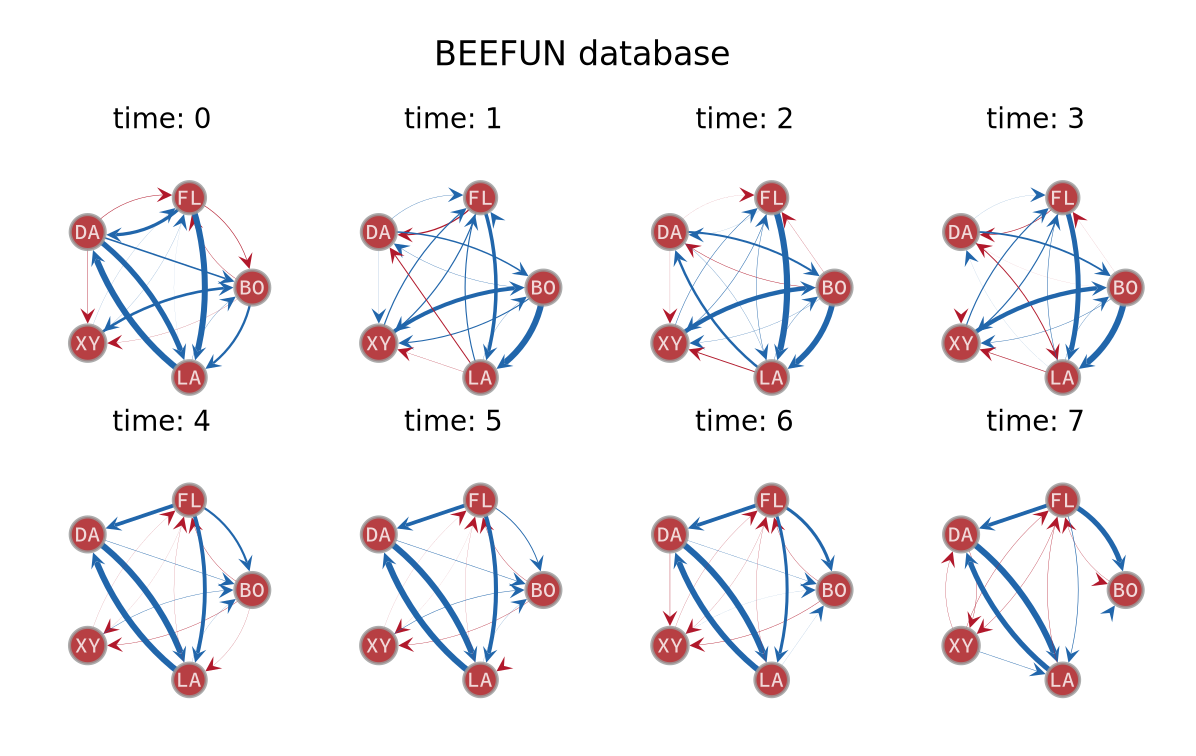

In [ ]:
display.Image(path)

## Analysing the imbalance between positive and negative interaction within the networks

In [ ]:
def imbalance_time_series(matrix_ts, i_db):
    pos_neg_ratio = []
    factor = env_factors[i_db][env_columns[i_db]].values
    total_time = len(factor)
    for t in range(total_time):
        matrix = matrix_ts[t]
        pos_interactions = matrix[matrix>0]
        neg_interactions = matrix[matrix<0]
        total_pos = np.abs(np.sum(pos_interactions))
        total_neg = np.abs(np.sum(neg_interactions))
        pos_neg_ratio.append(total_pos / total_neg)
    return pos_neg_ratio

def norm_imbalance_time_series(matrix_ts, i_db):
    pos_neg_ratio = []
    factor = env_factors[i_db][env_columns[i_db]].values
    total_time = len(factor)
    for t in range(total_time):
        matrix = matrix_ts[t]
        pos_interactions = matrix[matrix>0]
        neg_interactions = matrix[matrix<0]
        total_pos = np.abs(np.sum(pos_interactions))
        total_neg = np.abs(np.sum(neg_interactions))
        total = total_pos + total_neg
        pos_neg_ratio.append(total_pos / total)
    return pos_neg_ratio

In [ ]:
correct_env_factors = [
    'rainfall_anomaly.csv',
    'rainfall_anomaly.csv',
    'env.csv',
    'env.csv',
    'env.csv'
]

env_factors_std = []

for i_db in range(len(ind_data)):
    env_factors_std.append(pd.read_csv(data_path + ind_data[i_db] + "/" + correct_env_factors[i_db]))

8
9
43
27
15


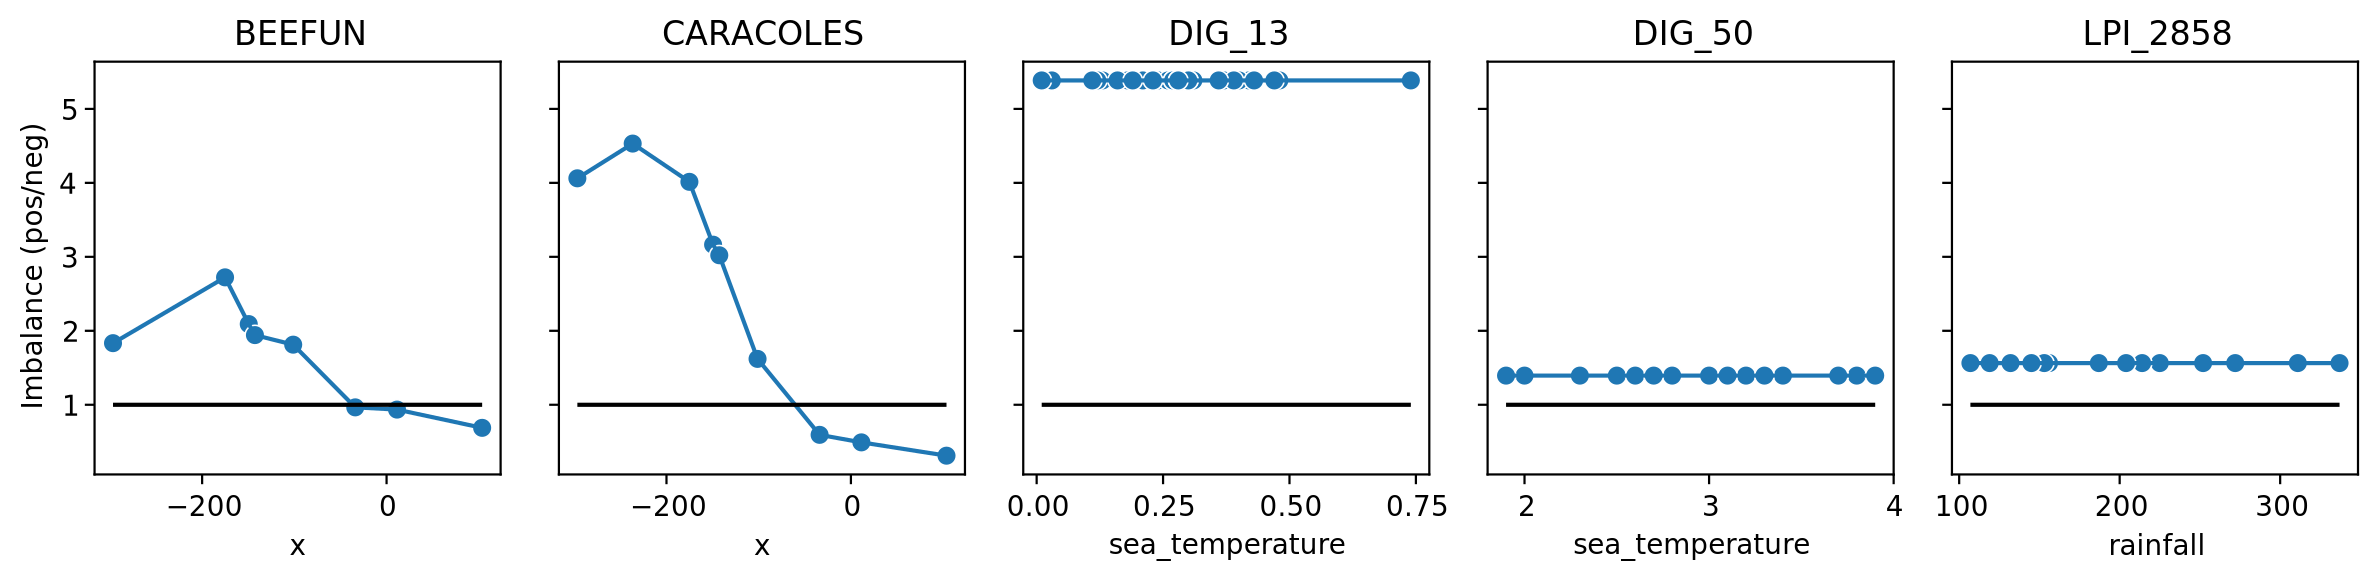

In [ ]:
imbalance = {}
norm_imbalance = {}
for i_db in range(len(ind_data)):
    #print(i_db)
    imbalance[i_db] = imbalance_time_series(matrix_A_ts_thresholded_new[i_db], i_db)
    #imbalance[i_db] = imbalance_time_series(matrix_A_ts_thresholded[i_db], i_db)
    #norm_imbalance[i_db] = norm_imbalance_time_series(matrix_A_ts_thresholded[i_db], i_db)
    print(len(imbalance[i_db]))

fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)

for i_db in range(len(ind_data)):
    sns.lineplot(x=env_factors_std[i_db][env_columns[i_db]].values, y=imbalance[i_db], ax=axs[i_db])
    sns.scatterplot(x=env_factors_std[i_db][env_columns[i_db]].values, y=imbalance[i_db], ax=axs[i_db],
                 s = 50)
    axs[i_db].hlines(y=1,
                     xmin=env_factors_std[i_db][env_columns[i_db]].values.min(),
                     xmax=env_factors_std[i_db][env_columns[i_db]].values.max(),
                     color='black')
    axs[i_db].set_title(ind_data[i_db])
    axs[i_db].set_xlabel(env_columns[i_db])
    axs[i_db].set_ylabel('Imbalance (pos/neg)')
fig.tight_layout()
fig.savefig('imbalance.png', dpi=200, bbox_inches='tight')
plt.close()
display.Image('imbalance.png')

In [ ]:
def get_norm_env(env_):
    env_shifted = env_ -np.min(env_)
    env_norm = env_shifted / np.max(env_shifted)
    return env_norm

In [ ]:
imbalance[0][0]

np.float64(1.8127121844619434)

In [ ]:
# Creating a dataframe of the analysed data
for i_db in range(len(ind_data)):
    data = {
    'pos_neg_ratio': [],
    'env_factor': [],
    'norm_env_factor':[]
    }
    for t in range(len(imbalance[i_db])):
        data['pos_neg_ratio'].append(imbalance[i_db][t])
        data['env_factor'].append(env_factors_std[i_db][env_columns[i_db]].values[t])
        data['norm_env_factor'].append(get_norm_env(env_factors_std[i_db][env_columns[i_db]].values)[t])
    data = pd.DataFrame(data)
    data.to_csv(f'ratio_{ind_data[i_db]}.csv')

In [ ]:
data

,pos_neg_ratio,env_factor,norm_env_factor
0,1.563717,119,0.052174
1,1.563717,311,0.886957
2,1.563717,272,0.717391
3,1.563717,225,0.513043
4,1.563717,214,0.465217
5,1.563717,156,0.213043
6,1.563717,252,0.630435
7,1.563717,153,0.200000
8,1.563717,132,0.108696
9,1.563717,145,0.165217


In [ ]:
def plot_ratio(db_name = 'BEEFUN', data = data, ax = ax):

    db_colors = {
        'BEEFUN':'#FF595E',
        'CARACOLES':'#FFCA3A',
        'DIG_13':'#8AC926',
        'DIG_50':'#1982C4',
        'LPI_2858':'#6A4C93'
    }

    x = data.norm_env_factor.values
    y = data.pos_neg_ratio.values
    sns.lineplot(x=x, y=y, ax=ax, label=db_name,
                marker='o', markersize=7, lw=2,
                color = db_colors[db_name])
    ax.hlines(y=1,
            xmin=-.2,
            xmax=1.2,
            color='black',
            linestyles='dashed',
        )
    #ax.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.7, 0.85))
    ax.set_ylim(0.1,6.)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylabel('Ratio (pos/neg)')
    ax.set_xlabel('Normalised environmental factor')

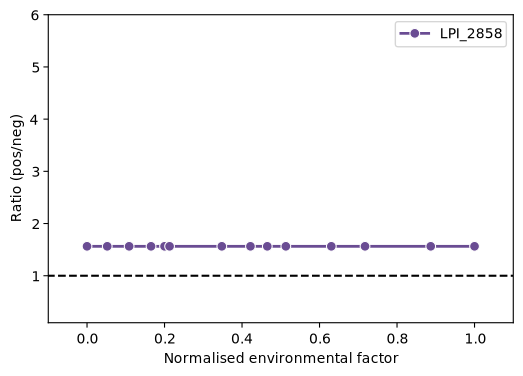

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
plot_ratio(db_name = 'LPI_2858', data = data, ax = ax)
fig.savefig('test.png', dpi=100, bbox_inches='tight')
plt.close()
display.Image('test.png')

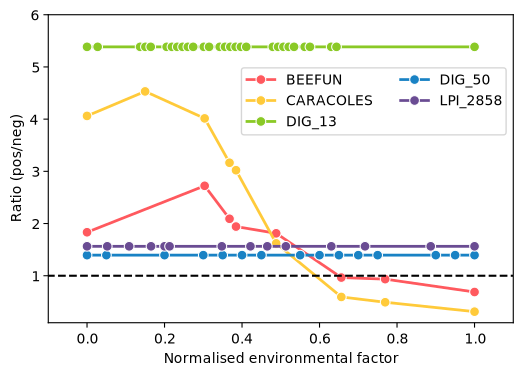

In [ ]:
db_colors = [
    '#FF595E',
    '#FFCA3A',
    '#8AC926',
    '#1982C4',
    '#6A4C93'
]

fig, ax = plt.subplots(figsize=(6, 4))
for i,db in enumerate(data.database.values):
    x = data[data.database == db].norm_env_factor.values[0]
    y = data[data.database == db].pos_neg_ratio.values[0]
    sns.lineplot(x=x, y=y, ax=ax, label=db,
                 marker='o', markersize=7, lw=2,
                 color = db_colors[i])
    #sns.scatterplot(x=x, y=y, ax=ax)
ax.hlines(y=1,
        xmin=-.2,
        xmax=1.2,
        color='black',
        linestyles='dashed',
    )
ax.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.7, 0.85))
ax.set_ylim(0.1,6.)
ax.set_xlim(-0.1,1.1)
ax.set_ylabel('Ratio (pos/neg)')
ax.set_xlabel('Normalised environmental factor')
fig.savefig('ratio_norm_env.png', dpi=100, bbox_inches='tight')
plt.close()
display.Image('ratio_norm_env.png')

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)

for i_db in range(len(ind_data)):
    sns.lineplot(x=env_factors_std[i_db][env_columns[i_db]].values, y=norm_imbalance[i_db], ax=axs[i_db])
    sns.scatterplot(x=env_factors_std[i_db][env_columns[i_db]].values, y=norm_imbalance[i_db], ax=axs[i_db],
                 s = 50)
    axs[i_db].hlines(y=0.5,
                     xmin=env_factors_std[i_db][env_columns[i_db]].values.min(),
                     xmax=env_factors_std[i_db][env_columns[i_db]].values.max(),
                     color='black',
                     linestyles='dashed',
    )
    axs[i_db].set_title(ind_data[i_db])
    axs[i_db].set_xlabel(env_columns[i_db])
    axs[i_db].set_ylabel('Norm-Imbalance (pos/total)')
fig.tight_layout()
fig.savefig('norm_imbalance.png', dpi=200, bbox_inches='tight')
plt.close()

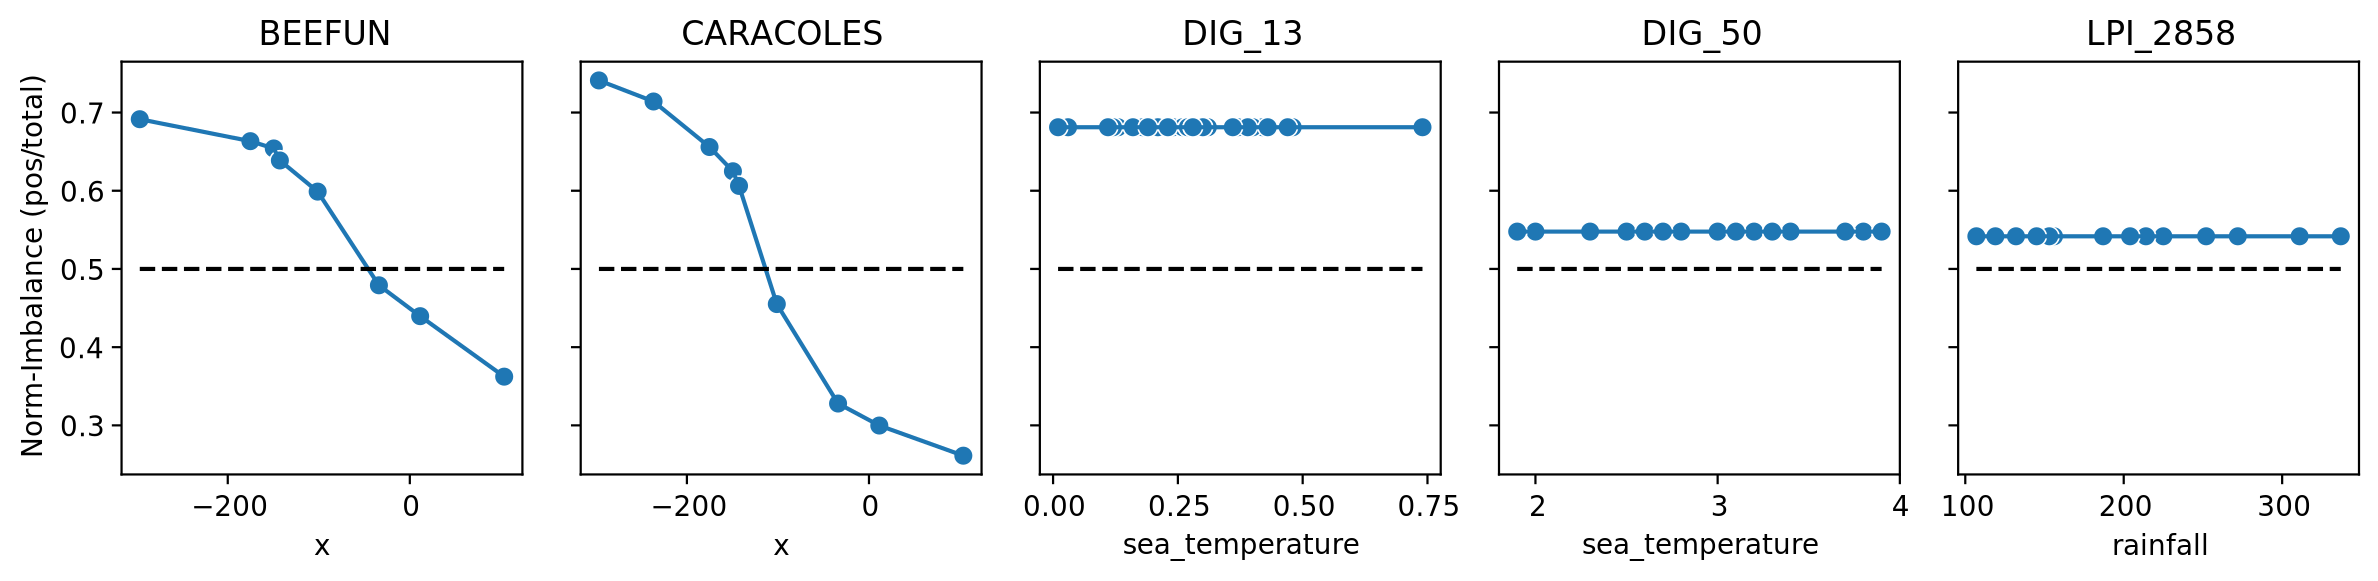

In [ ]:
display.Image('norm_imbalance.png')

## Analysing imbalance between pos and negative interaction within the nodes

In [ ]:
def node_balance(matrix):
    pos = np.where(matrix > 0, matrix, 0).sum(axis=1) + np.where(matrix > 0, matrix, 0).sum(axis=0)
    neg = np.where(matrix < 0, -matrix, 0).sum(axis=1) + np.where(matrix < 0, -matrix, 0).sum(axis=0)
    return pos / (neg + 1e-6)  # Avoid division by zero

In [ ]:
matrix_A_ts_thresholded[0][0]

array([[ 0.        ,  0.        , -0.06717894,  0.        ,  0.07155396],
       [ 0.        ,  0.        ,  0.10076536,  0.        ,  0.18635593],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.1666521 ],
       [ 0.08180436,  0.        , -0.14834506,  0.        , -0.24292467],
       [ 0.        ,  0.        ,  0.19225738, -0.07697525,  0.        ]])

In [ ]:
node_int_ts = []
for t in range(len(matrix_A_ts_thresholded[0])):
    node_int_ts.append(node_balance(matrix_A_ts_thresholded[0][t]))


In [ ]:
node_int_ts

[array([2.28279929e+00, 2.87121285e+05, 2.13281449e+00, 1.74703806e-01,
        1.92815749e+00]),
 array([1.37484509, 0.32006572, 0.14541998, 0.34273508, 0.7969268 ]),
 array([1.82389655, 0.92676117, 0.82477451, 0.27723273, 1.36230544]),
 array([1.56811942, 0.63655849, 0.39258253, 0.30555958, 1.15800762]),
 array([1.01547965, 8.74208448, 2.65830644, 0.        , 2.86837044]),
 array([0.8511908 , 8.66739354, 2.55523466, 0.        , 2.66878885]),
 array([0.7792933 , 8.96936091, 3.03347392, 0.        , 2.94154983]),
 array([0.75585125, 8.30699344, 5.29963449, 0.        , 2.79123267])]

In [ ]:
specie_int_ts = {}

for i in range(len(matrix_A_ts_thresholded[0][0])):
    specie_int_ts[i]= [values[i] for values in node_int_ts]

In [ ]:
fig, axs = plt.subplots(figsize=(6, 4))

for specie in specie_int_ts.keys():
    sns.lineplot(x=range(len(specie_int_ts[specie])), y=specie_int_ts[specie], ax=axs)
axs.set_ylabel('Specie balance (pos/neg)')
axs.set_yscale('log')
#axs.set_ylim(0,10)
axs.set_xlabel('Time')

axs.hlines(y=1,
                     xmin=0,
                     xmax=len(specie_int_ts[specie]),
                     color='black',
                     linestyles='dashed',
    )

fig.savefig('specie_balance.png', dpi=100, bbox_inches='tight')
plt.close()

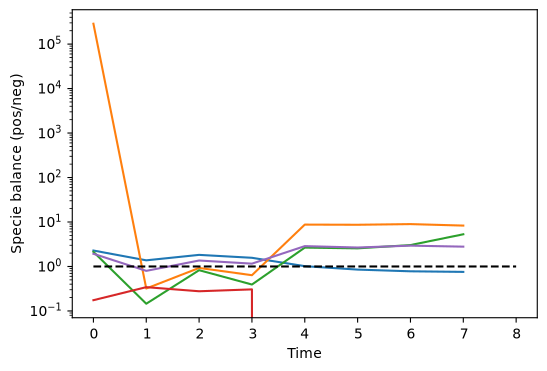

In [ ]:
display.Image('specie_balance.png')

### prototype

In [ ]:
i_db = 2
factor = env_factors[i_db][env_columns[i_db]].values
total_time = len(factor)

matrix_ts = matrix_A_ts_thresholded[i_db]

matrix = matrix_ts[1]
pos_interactions = np.where(matrix > 0, matrix, 0)
all_pos_interactions = pos_interactions.sum(axis=1) + pos_interactions.sum(axis=0)

neg_interactions = np.where(matrix < 0, matrix, 0)
all_neg_interactions = neg_interactions.sum(axis=1) + neg_interactions.sum(axis=0)

print(all_pos_interactions)
print(all_neg_interactions)

[0.01914516 0.01914516 0.        ]
[-0.00896031 -0.00896031  0.        ]


In [ ]:
all_pos_interactions - np.abs(all_neg_interactions) / (all_pos_interactions + np.abs(all_neg_interactions))

/tmp/ipython-input-700-114783098.py:1: RuntimeWarning: invalid value encountered in divide
  all_pos_interactions - np.abs(all_neg_interactions) / (all_pos_interactions + np.abs(all_neg_interactions))


array([-0.29966495, -0.29966495,         nan])

In [ ]:
np.mean()

np.float64(-0.0435653351107028)

### oficial

In [ ]:
def imbalance_pn_node(matrix_ts, i_db):
    ratio = []
    factor = env_factors[i_db][env_columns[i_db]].values
    total_time = len(factor)

    for t in range(total_time):
        matrix = matrix_ts[t]
        pos_interactions = matrix[matrix>0]
        neg_interactions = matrix[matrix<0]

        pos_interactions = np.where(matrix > 0, matrix, 0)
        all_pos_interactions = pos_interactions.sum(axis=1) + pos_interactions.sum(axis=0)

        neg_interactions = np.where(matrix < 0, matrix, 0)
        all_neg_interactions = neg_interactions.sum(axis=1) + neg_interactions.sum(axis=0)
        result = (all_pos_interactions - np.abs(all_neg_interactions)) / (all_pos_interactions + np.abs(all_neg_interactions))
        #print(result)
        clean_result = result[~np.isnan(result)]
        #print(clean_result)
        ratio.append(np.mean(clean_result))
    return ratio

In [ ]:
imbalance = {}
norm_imbalance = {}
for i_db in range(len(ind_data)):
    #print(i_db)
    imbalance[i_db] = imbalance_pn_node(matrix_A_ts_thresholded[i_db], i_db)
    print(len(imbalance[i_db]))

8
9
43
27
15


/tmp/ipython-input-30-939472743.py:16: RuntimeWarning: invalid value encountered in divide
  result = (all_pos_interactions - np.abs(all_neg_interactions)) / (all_pos_interactions + np.abs(all_neg_interactions))


In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)

for i_db in range(len(ind_data)):
    sns.lineplot(x=env_factors_std[i_db][env_columns[i_db]].values, y=imbalance[i_db], ax=axs[i_db])

    sns.scatterplot(x=env_factors_std[i_db][env_columns[i_db]].values, y=imbalance[i_db], ax=axs[i_db],
                 s = 50)
    axs[i_db].hlines(y=0,
                     xmin=env_factors_std[i_db][env_columns[i_db]].values.min(),
                     xmax=env_factors_std[i_db][env_columns[i_db]].values.max(),
                     color='black',
                     linestyles='dashed',
    )
    axs[i_db].set_title(ind_data[i_db], fontsize=10)
    axs[i_db].set_xlabel(env_columns[i_db])
    axs[i_db].set_ylabel('< Imbalance >')
fig.tight_layout()
fig.savefig('imbalance_node.png', dpi=300, bbox_inches='tight')
plt.close()

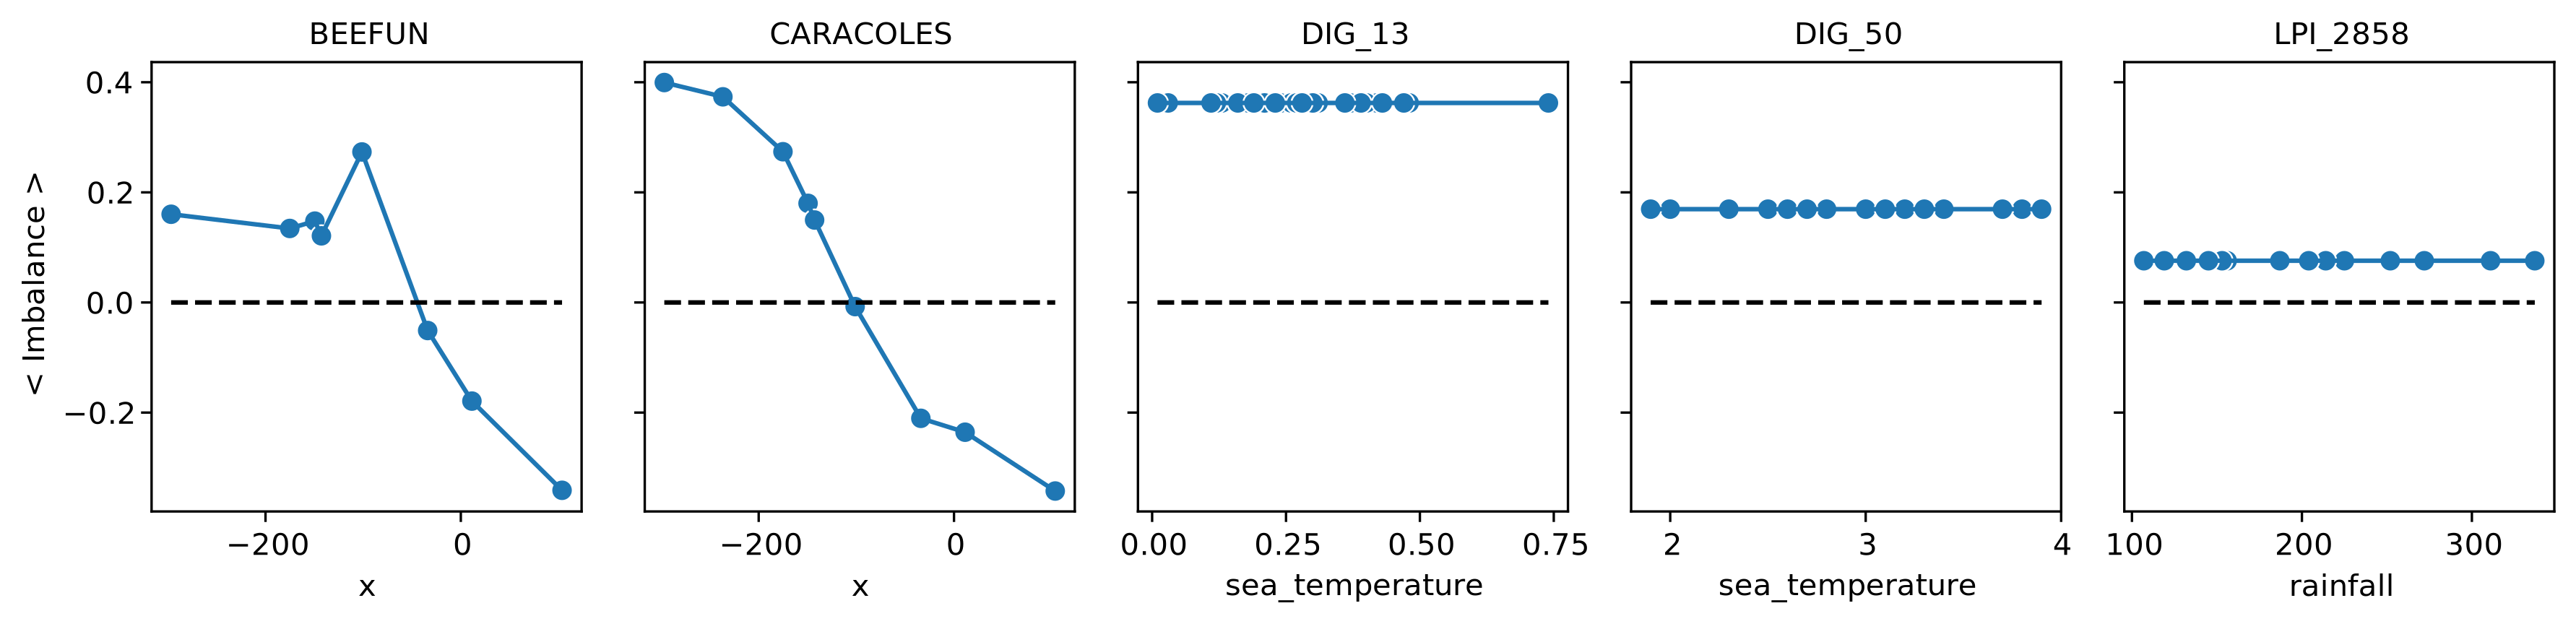

In [ ]:
display.Image('imbalance_node.png')